# 1° Introducción:

Se esta trabajando en  OilyGiant, una compañía de extracción de petróleo, el objetivo principal es identificar las mejores ubicaciones para abrir 200 nuevos pozos de petróleo, utilizando técnicas de aprendizaje automático para maximizar el rendimiento y minimizar los riesgos. El análisis de datos será fundamental para optimizar el proceso de selección, asegurando que se elijan los pozos más prometedores dentro de las regiones estudiadas, analizando los beneficios y riesgos potenciales utilizando la técnica bootstrapping.

# 2° Descripción de los datos:

Los datos de exploración geológica de las tres regiones se almacenan en archivos:

- geo_data_0.csv: Descarga el conjunto de datos
- geo_data_1.csv: Descarga el conjunto de datos
- geo_data_2.csv: Descarga el conjunto de datos
- id: identificador único de pozo de petróleo
- f0, f1, f2: tres características de los puntos (su significado específico no es importante, pero las características en sí son significativas)
- product: volumen de reservas en el pozo de petróleo (miles de barriles).

# 1° Descarga y preparación de los datos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Carga de los archivos CSV directamente desde el entorno de Jupyterhub
# file_path_region_0 = 'geo_data_0.csv'
# file_path_region_1 = 'geo_data_1.csv'
# file_path_region_2 = 'geo_data_2.csv'

file_path_region_0 = '/datasets/geo_data_0.csv'
file_path_region_1 = '/datasets/geo_data_1.csv'
file_path_region_2 = '/datasets/geo_data_2.csv'

# Carga de Los datos en DataFrames
data_region_0 = pd.read_csv(file_path_region_0)
data_region_1 = pd.read_csv(file_path_region_1)
data_region_2 = pd.read_csv(file_path_region_2)

# primeras filas de cada DataFrame para verificar
print("Región 0:")
print(data_region_0.head(), "\n")

print("Región 1:")
print(data_region_1.head(), "\n")

print("Región 2:")
print(data_region_2.head())

Región 0:
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647 

Región 1:
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305 

Región 2:
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


# 1.5° EDA (Analisis Exploratorio de Datos)

Descripción estadística de los datos - Región 0:
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347 

Descripción estadística de los datos - Región 1:
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -

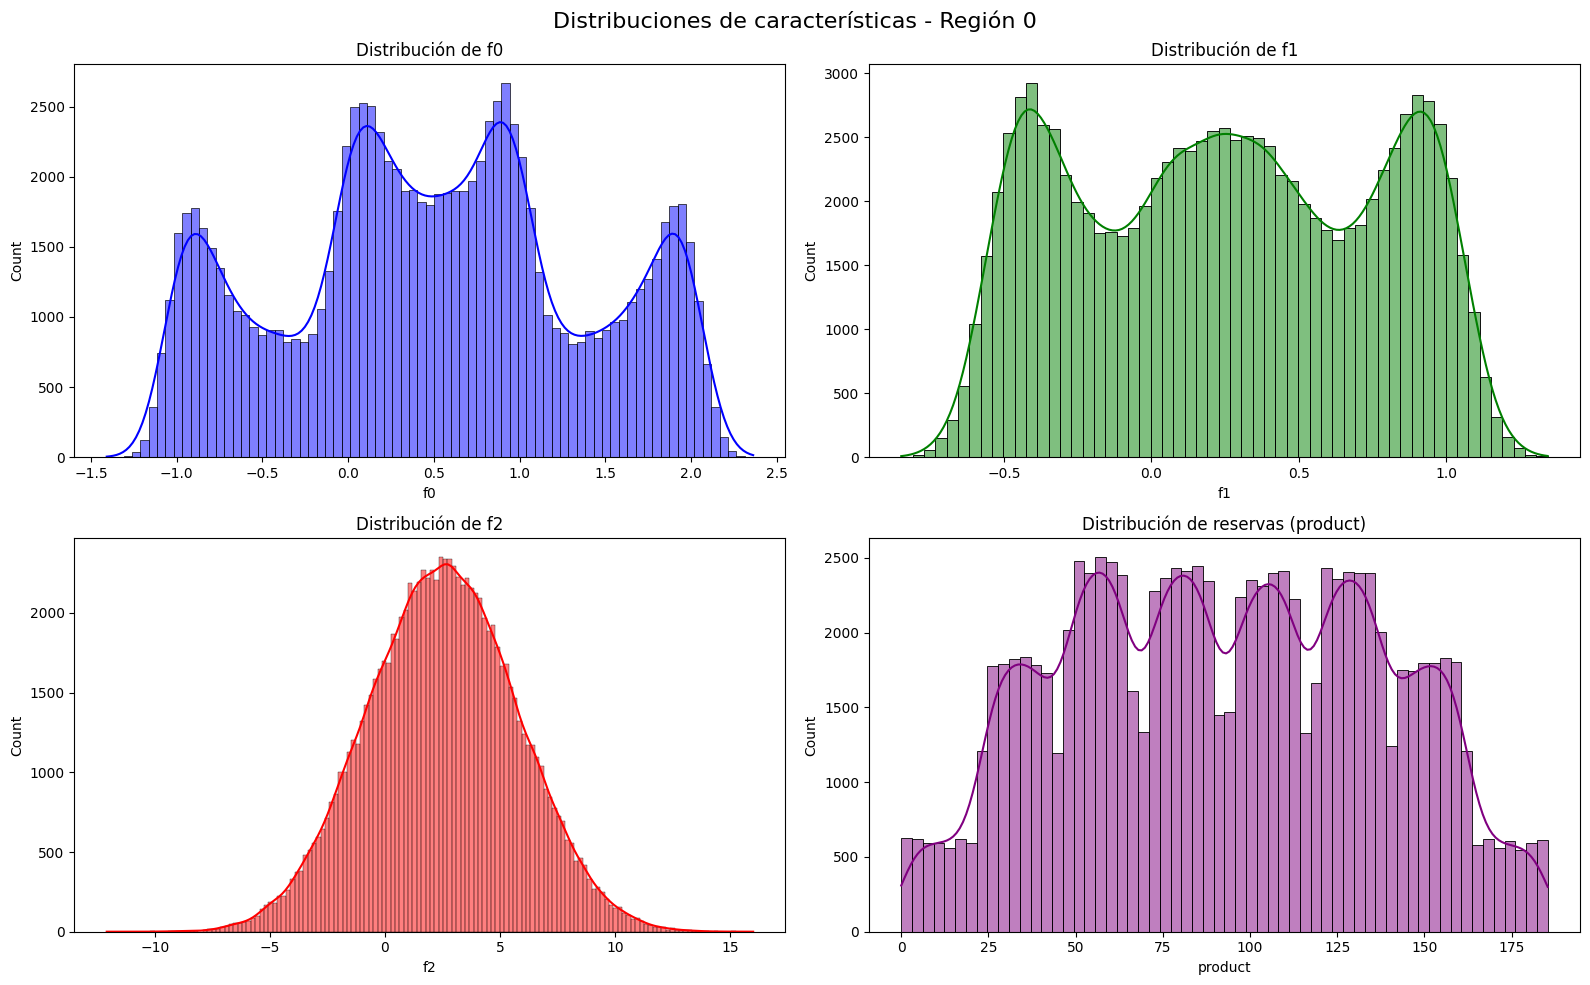

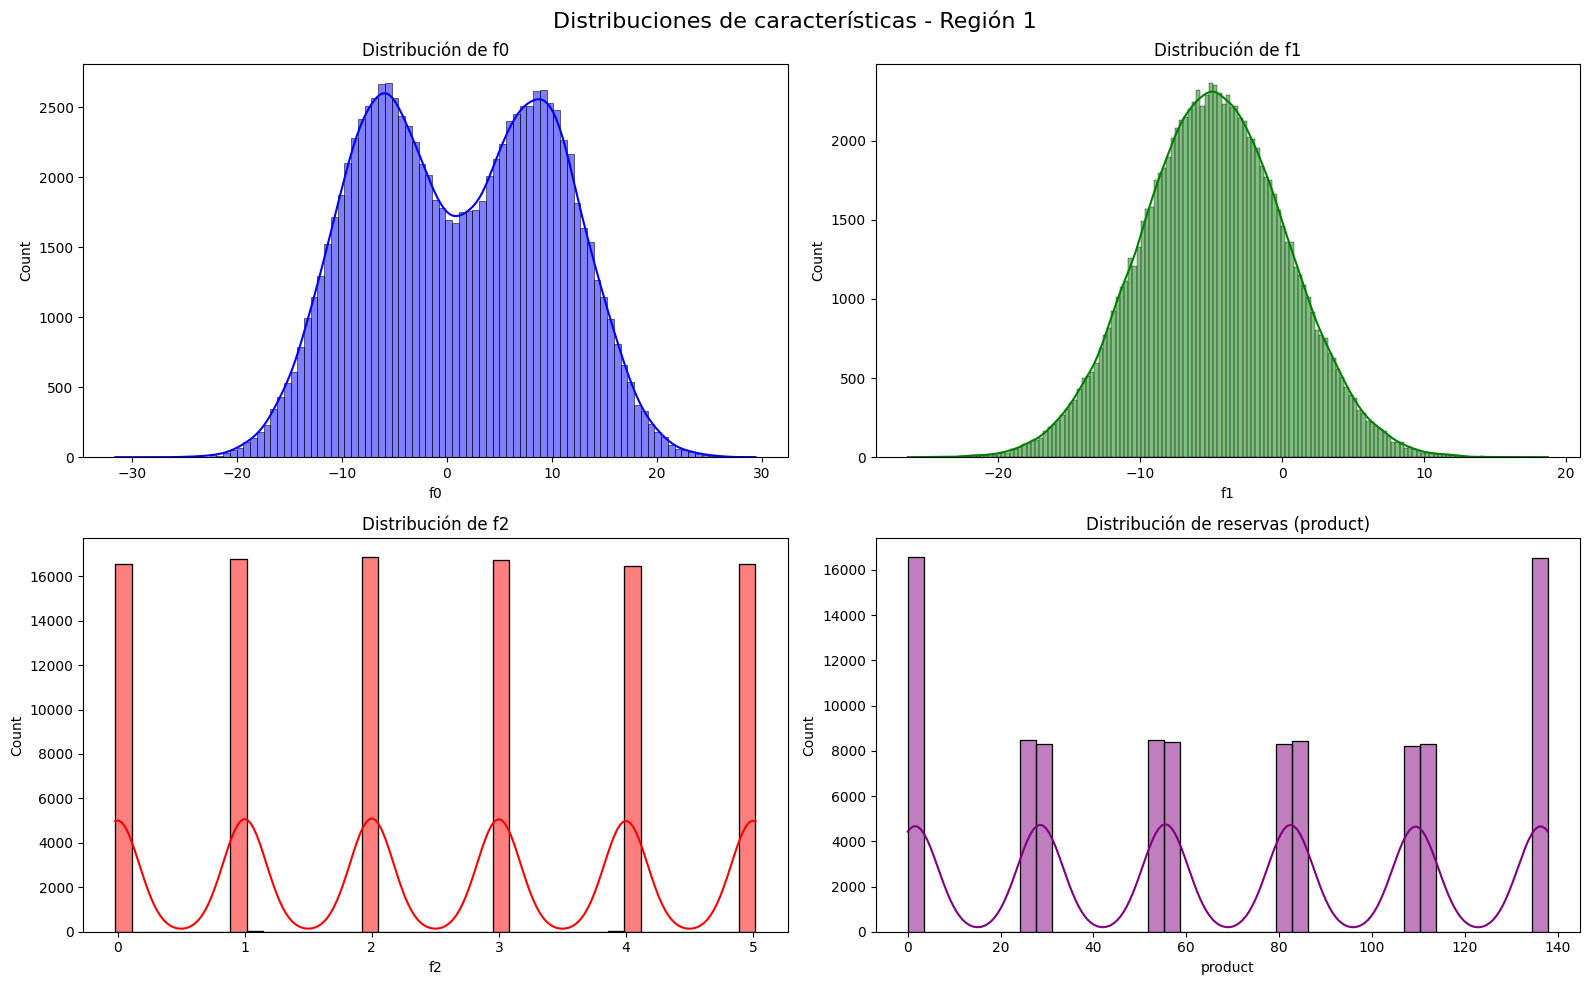

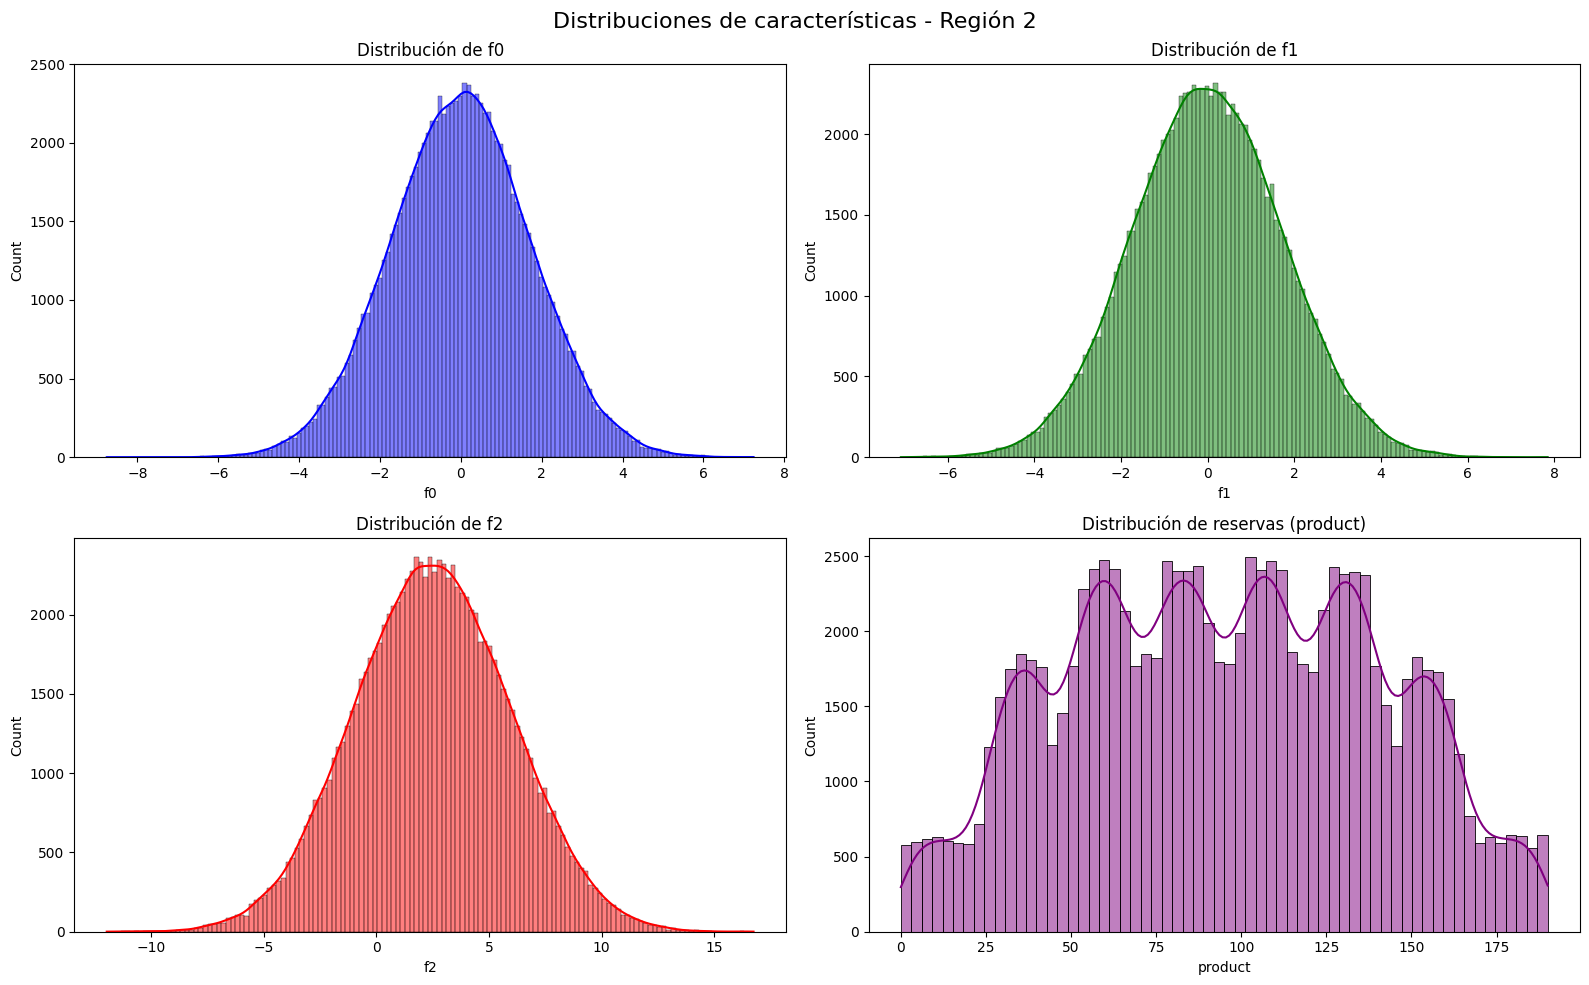

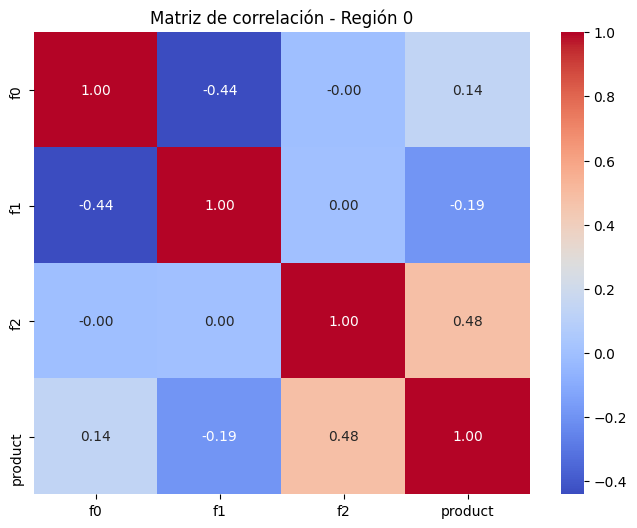

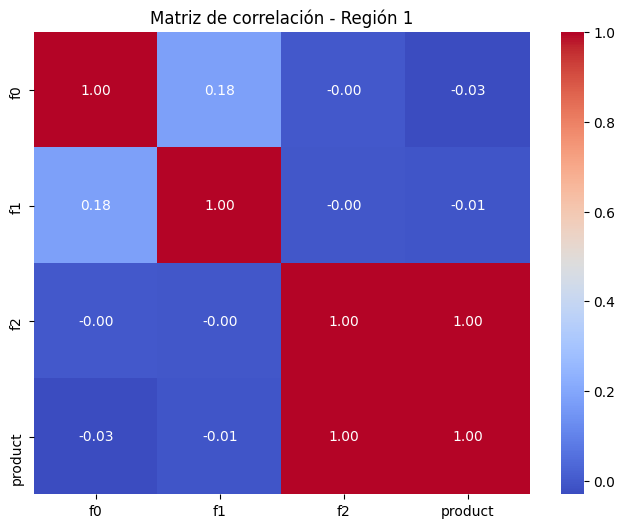

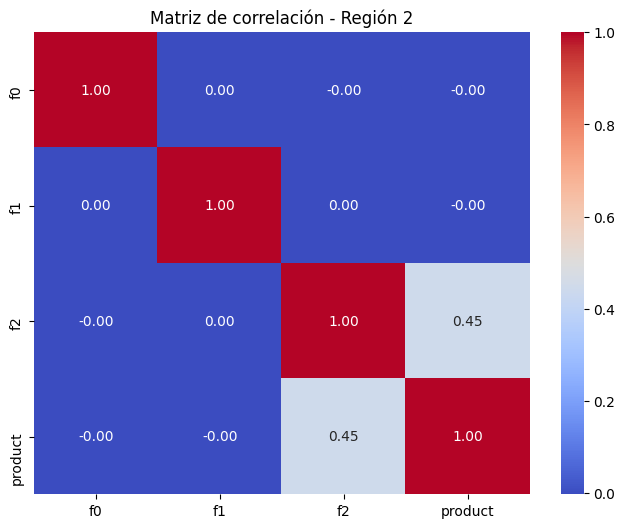

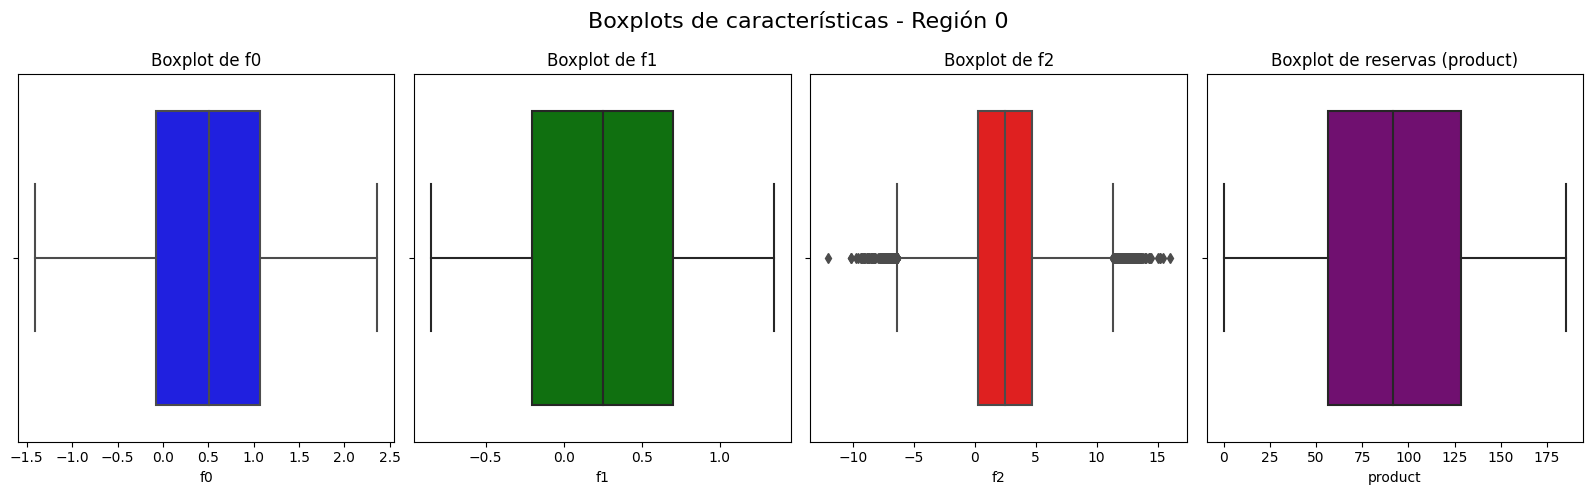

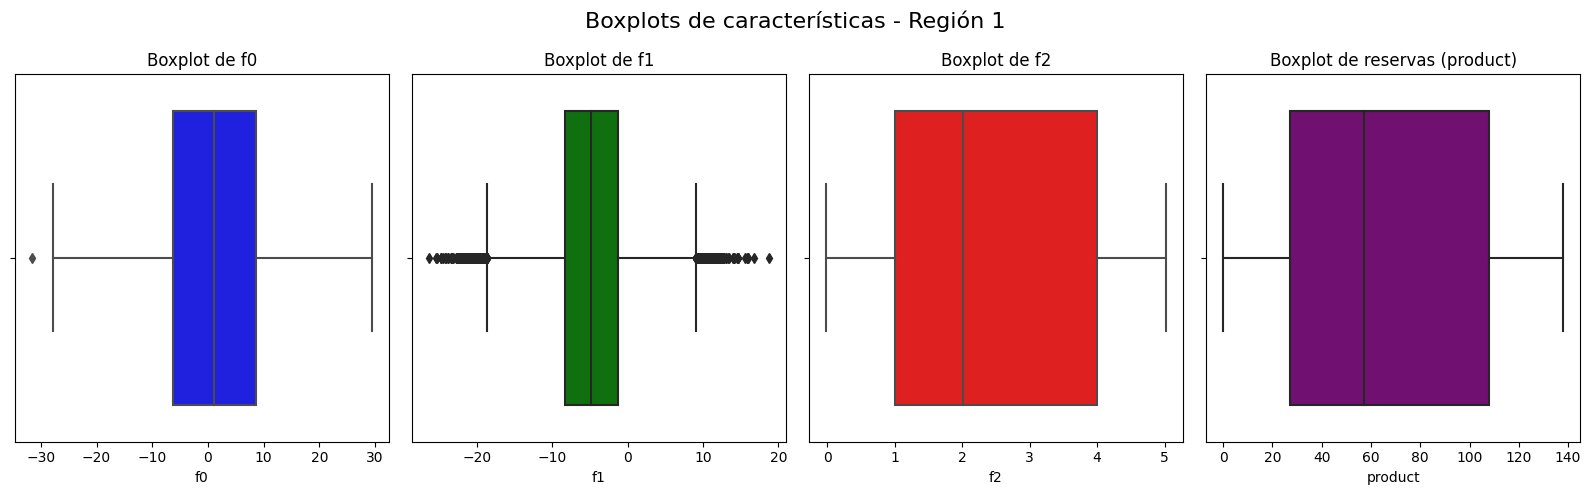

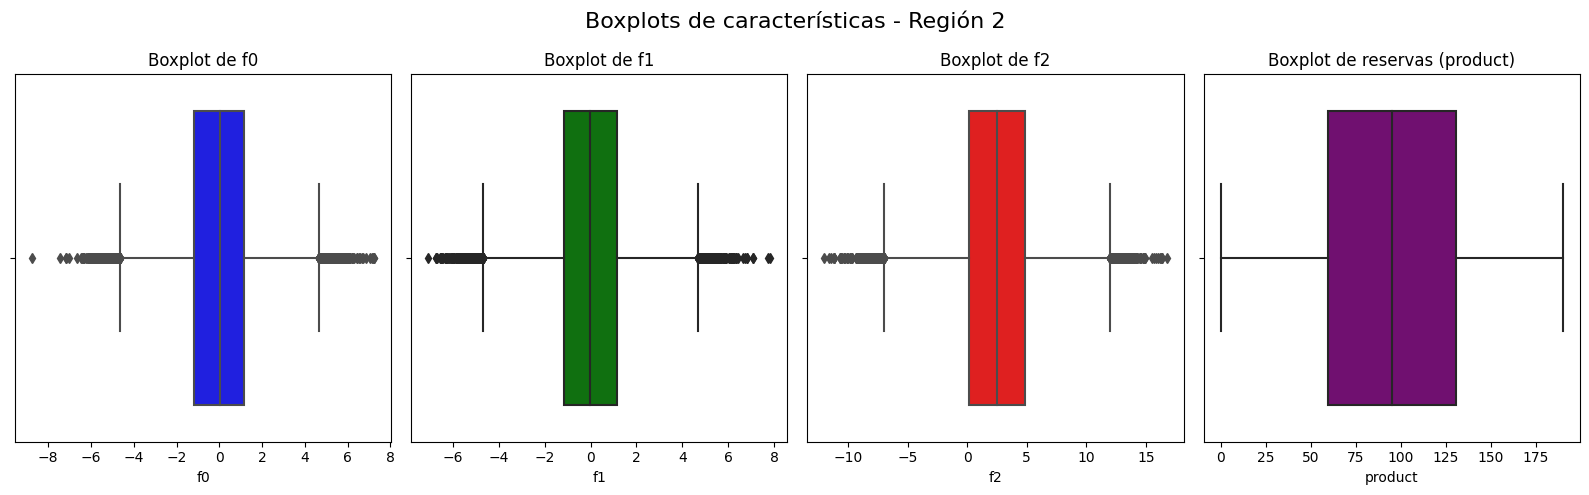

In [3]:
# 1. Descripción de las características
print("Descripción estadística de los datos - Región 0:")
print(data_region_0.describe(), "\n")

print("Descripción estadística de los datos - Región 1:")
print(data_region_1.describe(), "\n")

print("Descripción estadística de los datos - Región 2:")
print(data_region_2.describe(), "\n")

# 2. Distribuciones de las características
def plot_distributions(data, region_name):
    plt.figure(figsize=(16, 10))
    plt.suptitle(f"Distribuciones de características - Región {region_name}", fontsize=16)

    plt.subplot(2, 2, 1)
    sns.histplot(data['f0'], kde=True, color='blue')
    plt.title('Distribución de f0')

    plt.subplot(2, 2, 2)
    sns.histplot(data['f1'], kde=True, color='green')
    plt.title('Distribución de f1')

    plt.subplot(2, 2, 3)
    sns.histplot(data['f2'], kde=True, color='red')
    plt.title('Distribución de f2')

    plt.subplot(2, 2, 4)
    sns.histplot(data['product'], kde=True, color='purple')
    plt.title('Distribución de reservas (product)')

    plt.tight_layout()
    plt.show()

# Graficar las distribuciones para cada región
plot_distributions(data_region_0, "0")
plot_distributions(data_region_1, "1")
plot_distributions(data_region_2, "2")

# 3. Matriz de correlación
def plot_correlation_matrix(data, region_name):
    plt.figure(figsize=(8, 6))
    corr_matrix = data.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Matriz de correlación - Región {region_name}')
    plt.show()

# Matriz de correlación para cada región
plot_correlation_matrix(data_region_0, "0")
plot_correlation_matrix(data_region_1, "1")
plot_correlation_matrix(data_region_2, "2")

# 4. Boxplots para identificar outliers
def plot_boxplots(data, region_name):
    plt.figure(figsize=(16, 5))
    plt.suptitle(f"Boxplots de características - Región {region_name}", fontsize=16)

    plt.subplot(1, 4, 1)
    sns.boxplot(data=data, x='f0', color='blue')
    plt.title('Boxplot de f0')

    plt.subplot(1, 4, 2)
    sns.boxplot(data=data, x='f1', color='green')
    plt.title('Boxplot de f1')

    plt.subplot(1, 4, 3)
    sns.boxplot(data=data, x='f2', color='red')
    plt.title('Boxplot de f2')

    plt.subplot(1, 4, 4)
    sns.boxplot(data=data, x='product', color='purple')
    plt.title('Boxplot de reservas (product)')

    plt.tight_layout()
    plt.show()

# Graficar de los boxplots para cada región
plot_boxplots(data_region_0, "0")
plot_boxplots(data_region_1, "1")
plot_boxplots(data_region_2, "2")

# 2° y 3° Entrenamiento y prueba el modelo para cada región y prepáción para el cálculo de ganancias:

In [4]:
# Función para entrenar el modelo, predecir y calcular métricas
def train_and_evaluate(data, region_name):
    # Dividición de los datos en características (X) y objetivo (y)
    X = data[['f0', 'f1', 'f2']]
    y = data['product']
    
    # Dividición del conjunto de datos en conjunto de entrenamiento y validación (75%-25%)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # Entrenamiento del modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predicciones en el conjunto de validación
    predictions = model.predict(X_valid)
    
    # CalculO el RMSE
    rmse = mean_squared_error(y_valid, predictions, squared=False)
    
    # resultados
    print(f"Región {region_name}:")
    print(f"RMSE: {rmse}")
    print(f"Volumen medio de reservas predicho: {predictions.mean()} miles de barriles\n")
    
    # Retornar el modelo, las predicciones y el RMSE
    return model, predictions, y_valid, rmse

# Entrenamiento y evaluación para cada región
model_region_0, predictions_region_0, y_valid_region_0, rmse_region_0 = train_and_evaluate(data_region_0, "0")
model_region_1, predictions_region_1, y_valid_region_1, rmse_region_1 = train_and_evaluate(data_region_1, "1")
model_region_2, predictions_region_2, y_valid_region_2, rmse_region_2 = train_and_evaluate(data_region_2, "2")


Región 0:
RMSE: 37.756600350261685
Volumen medio de reservas predicho: 92.3987999065777 miles de barriles

Región 1:
RMSE: 0.890280100102884
Volumen medio de reservas predicho: 68.71287803913762 miles de barriles

Región 2:
RMSE: 40.14587231134218
Volumen medio de reservas predicho: 94.77102387765939 miles de barriles



# Conslusiones:
Hasta ahora, hemos identificado que ninguna de las regiones alcanza el umbral de 111.1 miles de barriles en promedio, aunque la Región 1 tiene el modelo más preciso (con menor RMSE), pero sus reservas predichas son las más bajas.

# 4°  Función para calcular la ganancia de un conjunto de pozos de petróleo seleccionados y modelación de las predicciones:

In [5]:
# Parámetros de negocio
pozos = 200  # Número de pozos a desarrollar
precio_por_barril = 4.5  # Precio de cada barril en USD
umbral_minimo = 111.1  # Umbral mínimo de barriles para evitar pérdidas

# Función para calcular la ganancia potencial de los 200 mejores pozos
def calcular_ganancias(predictions, region_name):
    # Seleccionar los 200 pozos con las predicciones más altas utilizando la función np.sort () para ordenar las predicciones de mayor a menor 
    mejores_pozos = np.sort(predictions)[-pozos:] # seleccion de los 200 pozos con valores mas altos.
    
    # Calculo del volumen total de reservas (en miles de barriles)
    volumen_total = mejores_pozos.sum()
    
    # Calculo de la ganancia total en dólares
    ganancia_total = volumen_total * precio_por_barril * 1000  # Convercción de miles de barriles a barriles
    
    # Resultados
    print(f"Región {region_name}:")
    print(f"Volumen total de reservas predicho para los 200 mejores pozos: {volumen_total} miles de barriles")
    print(f"Ganancia total estimada: ${ganancia_total:,.2f} USD\n")
    
    # Retornar la ganancia total
    return ganancia_total

# Calculo de la ganancias para las tres regiones
ganancia_region_0 = calcular_ganancias(predictions_region_0, "0")
ganancia_region_1 = calcular_ganancias(predictions_region_1, "1")
ganancia_region_2 = calcular_ganancias(predictions_region_2, "2")


Región 0:
Volumen total de reservas predicho para los 200 mejores pozos: 30881.463288146995 miles de barriles
Ganancia total estimada: $138,966,584.80 USD

Región 1:
Volumen total de reservas predicho para los 200 mejores pozos: 27748.75136666462 miles de barriles
Ganancia total estimada: $124,869,381.15 USD

Región 2:
Volumen total de reservas predicho para los 200 mejores pozos: 29728.847808255447 miles de barriles
Ganancia total estimada: $133,779,815.14 USD



# Conclusión:

Según los resultados obtenidos la zona con la mayor rentabilidad es la **Región 0** al tener la mayor ganancia estimada con ($138,966,584.80 USD), por lo que sería la región propuesta para desarrollar de los pozos petrolíferos, en segundo lugar se ecuentra la Región 2 y por ultimo la Región 1.

# 5° Calculo de riesgos y ganancias:

In [6]:
# Parámetros de negocio
pozos = 200
precio_por_barril = 4.5  # USD por barril
bootstrap_iterations = 1000  # Número de iteraciones para el bootstrapping
budget = 100_000_000  # USD

# Función para seleccionar los 200 mejores pozos y realizar el bootstrapping de ganancias
def bootstrapping_mejores_pozos(predictions, region_name):
    # Seleccionar los 200 mejores pozos (los que tienen las mayores predicciones de reservas)
    mejores_pozos = np.sort(predictions)[-pozos:]
    
    np.random.seed(42)  # Fijamos la semilla para reproducibilidad
    valores_muestras = []  # Lista para almacenar las ganancias de cada muestra
    
    for i in range(bootstrap_iterations):
        # Tomar una muestra aleatoria con reemplazo de los 200 mejores pozos seleccionados
        muestra = np.random.choice(mejores_pozos, size=pozos, replace=True)
        
        # Calcular el volumen total de la muestra
        volumen_muestra = muestra.sum()
        
        # Calcular las ganancias para la muestra
        ganancia_muestra = volumen_muestra * precio_por_barril * 1000  # Convertir a barriles y calcular ganancia
        valores_muestras.append(ganancia_muestra)
    
    # Convertir a numpy array para análisis estadístico
    valores_muestras = np.array(valores_muestras)
    
    # Calcular el beneficio promedio
    beneficio_promedio = valores_muestras.mean()
    
    # Calcular el intervalo de confianza del 95%
    intervalo_confianza = np.percentile(valores_muestras, [2.5, 97.5])
    
    # Calcular el riesgo de pérdidas (casos donde la ganancia es menor que el presupuesto)
    probabilidad_perdida = (valores_muestras < budget).mean() * 100  # Convertimos a porcentaje
    
    # Mostrar resultados
    print(f"Región {region_name}:")
    print(f"Beneficio promedio: ${beneficio_promedio:,.2f} USD")
    print(f"Intervalo de confianza del 95%: ${intervalo_confianza[0]:,.2f} - ${intervalo_confianza[1]:,.2f} USD")
    print(f"Riesgo de pérdidas: {probabilidad_perdida:.2f}%\n")
    
    # Retornar los valores clave
    return beneficio_promedio, intervalo_confianza, probabilidad_perdida

# Realizar el bootstrapping y calcular riesgos para cada región
beneficio_promedio_0, intervalo_0, perdida_0 = bootstrapping_mejores_pozos(predictions_region_0, "0")
beneficio_promedio_1, intervalo_1, perdida_1 = bootstrapping_mejores_pozos(predictions_region_1, "1")
beneficio_promedio_2, intervalo_2, perdida_2 = bootstrapping_mejores_pozos(predictions_region_2, "2")


Región 0:
Beneficio promedio: $138,946,100.05 USD
Intervalo de confianza del 95%: $138,166,444.15 - $139,698,651.98 USD
Riesgo de pérdidas: 0.00%

Región 1:
Beneficio promedio: $124,868,482.72 USD
Intervalo de confianza del 95%: $124,835,988.20 - $124,900,213.80 USD
Riesgo de pérdidas: 0.00%

Región 2:
Beneficio promedio: $133,760,912.54 USD
Intervalo de confianza del 95%: $133,127,274.00 - $134,375,479.33 USD
Riesgo de pérdidas: 0.00%



# Conclusión General:

Como se menciono en el anterior punto la región mas rentable es la **Región 0** ya que esta tiene promedio más alto y sin riesgo de pérdidas, todos los intervalos de confianza son bastante estrechos, lo que indica que las estimaciones son consistentes y no varían mucho y dentro de los intervalos de confianza también la región 0 tiene el estimado mas alto de ganancias, en segundo lugar y como opción alternativa sería la región 2.

**Por lo que la Región 0 es la región seleccionada para el desarrollo de pozos petrolíferos con un beneficio promedio estimado de entre  $138,166,444.15 - $139,698,651.98 USD**